In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId',inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data.shape

(891, 11)

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)

In [12]:
data.dropna(axis=1,inplace=True)

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# 5. Check and handle outliers in at least 3 columns in the dataset

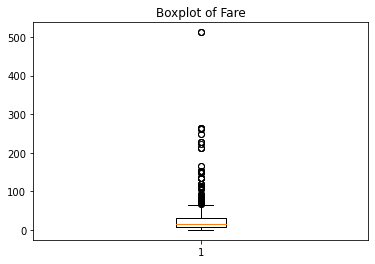

In [15]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [16]:
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [17]:
print(Q1,Q2,Q3)

7.9104 14.4542 31.0


In [18]:
data['Fare'].median()

14.4542

In [19]:
print(lower_lim)
print(upper_lim)

-26.724
65.6344


In [20]:
outlier=[]
for x in data['Fare']:
    if((x>upper_lim)or(x<lower_lim)):
        outlier.append(x)

In [21]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [22]:
ind1=data['Fare']>upper_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [23]:
median=data.loc[data['Fare']>65.6344,'Fare'].median()
data.loc[data.Fare>65.6344,'Fare']=np.nan
data.fillna(median,inplace=True)

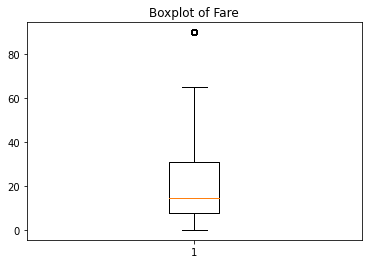

In [24]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

after replacing the outlier with median

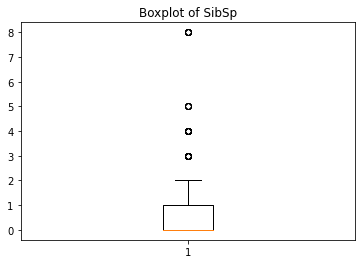

In [25]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')
plt.show()

In [26]:
Q1=np.percentile(data['SibSp'],25)
Q2=np.percentile(data['SibSp'],50)
Q3=np.percentile(data['SibSp'],75)
IQR=Q3-Q1
low_limt=Q1-1.5*IQR
up_limt=Q3+1.5*IQR
print(low_limt)
print(up_limt)

-1.5
2.5


In [27]:
outlier=[]
for x in (data['SibSp']):
    if((x>up_limt)or(x<low_limt)):
        outlier.append(x)
        
print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [28]:
ind_1=data['SibSp']>up_limt
data.loc[ind_1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [29]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

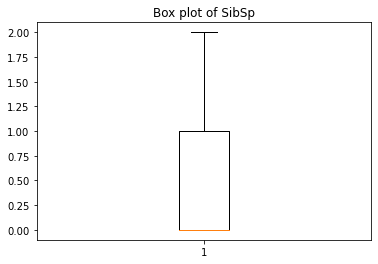

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

C:\hp\anaconda3\envs\ipykernel_py3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

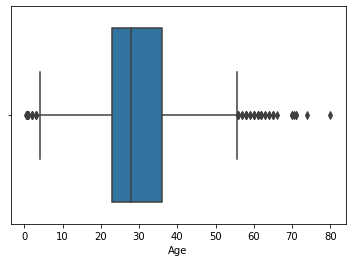

In [31]:
sns.boxplot(data['Age'])

In [32]:
Q1=np.percentile(data['Age'],25)
Q2=np.percentile(data['Age'],50)
Q3=np.percentile(data['Age'],75)
IQR=Q3-Q1
lower_limt=Q1-1.5*IQR
upper_limt=Q3+1.5*IQR
print(upper_limt)
print(lower_limt)

55.5
3.5


In [33]:
outlier=[]
for x in (data['Age']):
    if((x>upper_limt)or(x<lower_limt)):
        outlier.append(x)
print(outlier)

[58.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 61.0, 1.0, 56.0, 1.0, 3.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 3.0, 60.0, 1.0, 3.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 1.0, 62.0, 0.83, 74.0, 56.0]


In [35]:
indx=data['Age'][(data['Age']>upper_limt)|(data['Age']<lower_limt)].index

In [36]:
indx

Int64Index([ 12,  34,  44,  55,  79,  95,  97, 117, 171, 173, 175, 184, 194,
            196, 206, 233, 253, 269, 276, 281, 298, 306, 327, 341, 349, 367,
            382, 408, 439, 457, 468, 470, 480, 484, 488, 494, 531, 546, 556,
            571, 588, 626, 627, 631, 645, 648, 660, 673, 685, 695, 746, 756,
            773, 789, 804, 828, 830, 832, 852, 880],
           dtype='int64', name='PassengerId')

In [37]:
data.drop(indx,inplace=True)

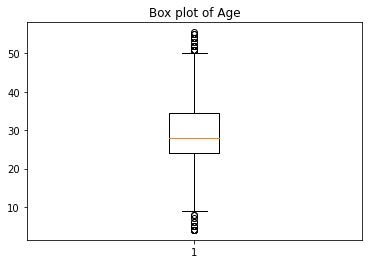

In [38]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [39]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [40]:
from sklearn import preprocessing 

In [41]:
y=data['Survived']
x=data.drop(['Survived','Ticket','Embarked','Name','Sex'],axis=1)

In [42]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [43]:
x=min_max.fit_transform(x)

In [44]:
x=pd.DataFrame(x)

In [45]:
x.describe()

,0,1,2,3,4
count,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.658599,0.492177,0.153503,0.048408,0.284000
std,0.414969,0.189772,0.263059,0.125675,0.299009
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.388350,0.000000,0.000000,0.087731
50%,1.000000,0.466019,0.000000,0.000000,0.144444
75%,1.000000,0.592233,0.500000,0.000000,0.308333
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [47]:
from sklearn import linear_model
lr= linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,prediction))

MSE is: 0.2064781050407935


In [49]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test, prediction))

R squared value is: 0.15260093054436918
